Viết chương trình chọn LangBiang trong ảnh Đà Lạt từ thư mục exercise.Tịnh tiến vùng chọn sang phải 100px. Sử dụng phương pháp Otsu để phân vùng LangBiang theo ngưỡng 0.3. Lưu vào máy với tên lang_biang.jpg và hiển thị trên màn hình output.

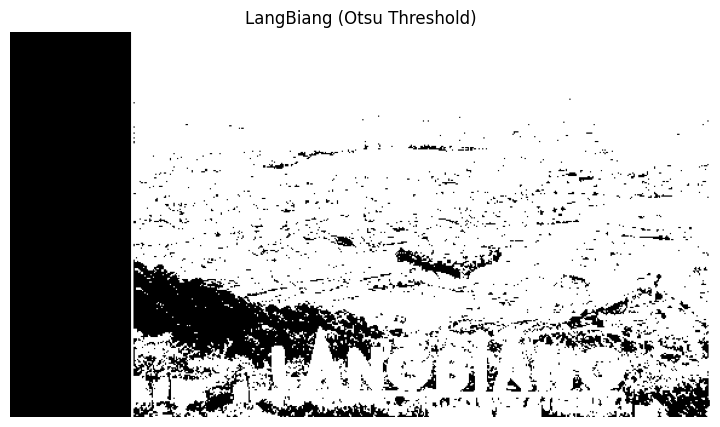

In [3]:
# 1. Import thư viện
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
from skimage import img_as_ubyte

# 2. Đọc ảnh lớn và template
img = cv2.imread("exercise/dalat.jpg")
template = cv2.imread("exercise/langbiang_template.jpg")

# Chuyển sang grayscale để so khớp
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
h, w = template_gray.shape

# 3. Dùng Template Matching để tìm vị trí phù hợp nhất
result = cv2.matchTemplate(img_gray, template_gray, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc  # Điểm bắt đầu của vùng khớp tốt nhất
bottom_right = (top_left[0] + w, top_left[1] + h)

# 4. Cắt vùng LangBiang từ ảnh gốc
langbiang_crop = img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

# 5. Tịnh tiến sang phải 100px
height, width, _ = langbiang_crop.shape
translated_canvas = np.zeros((height, width + 100, 3), dtype=np.uint8)
translated_canvas[:, 100:100 + width] = langbiang_crop

# 6. Chuyển sang ảnh nhị phân bằng Otsu + ngưỡng >= 0.3
gray_crop = rgb2gray(translated_canvas)
otsu_thresh = threshold_otsu(gray_crop)
custom_thresh = max(otsu_thresh, 0.3)
binary = gray_crop > custom_thresh
binary_img = img_as_ubyte(binary)

# 7. Lưu ảnh và hiển thị
cv2.imwrite("lang_biang.jpg", binary_img)

plt.figure(figsize=(10, 5))
plt.imshow(binary, cmap='gray')
plt.title("LangBiang (Otsu Threshold)")
plt.axis('off')
plt.show()
